# CAPSTONE PROJECT

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from patsy import dmatrices
from sklearn import linear_model
from sklearn import ensemble

## Data Set Overview

The Bank Marketing data set used in this project is related with the direct marketing campaigns (phone calls) of a Portuguese banking institution. This data set is publicly avaiable for research on the UCI Machine Learning Repository. It was donated to this repository on 02/14/2012.  

The banking data can be accessed in a zip folder "bank.zip" via https://archive.ics.uci.edu/ml/machine-learning-databases/00222/. The file is renamed as "banking_data.csv.

In [2]:
# (1) Read file banking_data.csv in a Jupyter Notebook Python using pandas.
bank = pd.read_csv('banking_data.csv', sep=';')

In [3]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


## Data Set Description - Exploring the Basics
There are a total of 45211 entries and 17 columns. There are no missing values in this data set. 

The goal is to predict of the client will subscribe (yes/no) a term deposit (variable y). 

## Attribute Information:
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: balance of the individual (numeric)

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - day: last contact date (numeric)

11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [4]:
# Data cleanup
bank = bank.rename(columns={"day":"date", "y":"deposit"})
bank.drop ('duration', inplace=True, axis=1)

# The duration variable is dropped from the data set since this attribute is highly correlated with whether the client
# would sign up for the term deposit. Also, as mentioned in the attribute information above,the duration is not known 
# before a call is performed. After the end of the call y is obviously known. This input should only be included 
# for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [5]:
# Let's look at the first few rows in the data set.
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,date,month,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


## Data Visualization

Distribution of numeric data


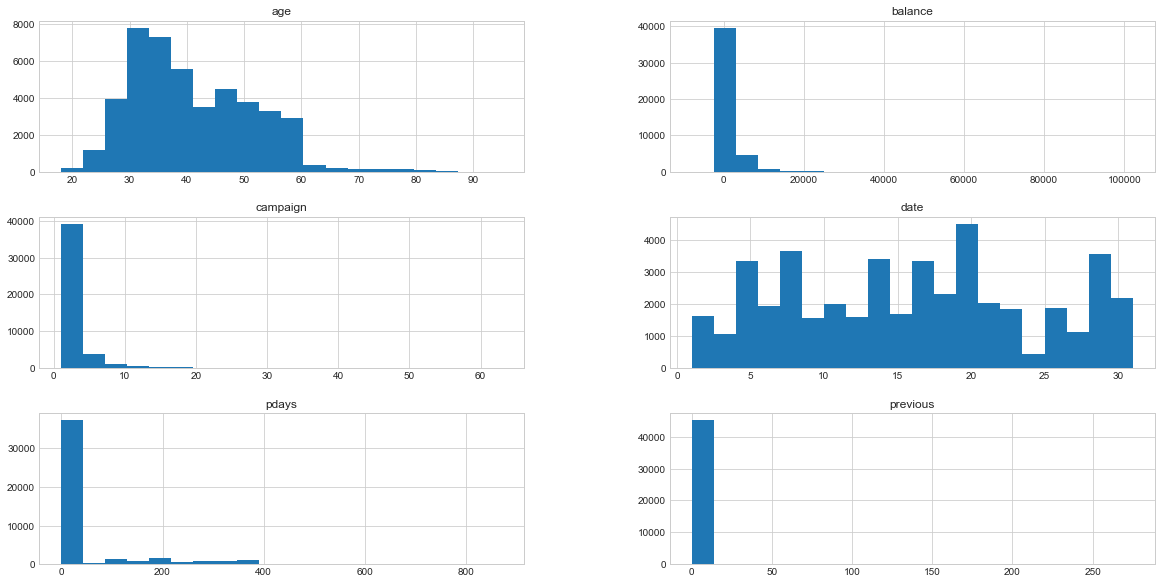

In [6]:
print("Distribution of numeric data")
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(20,10))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


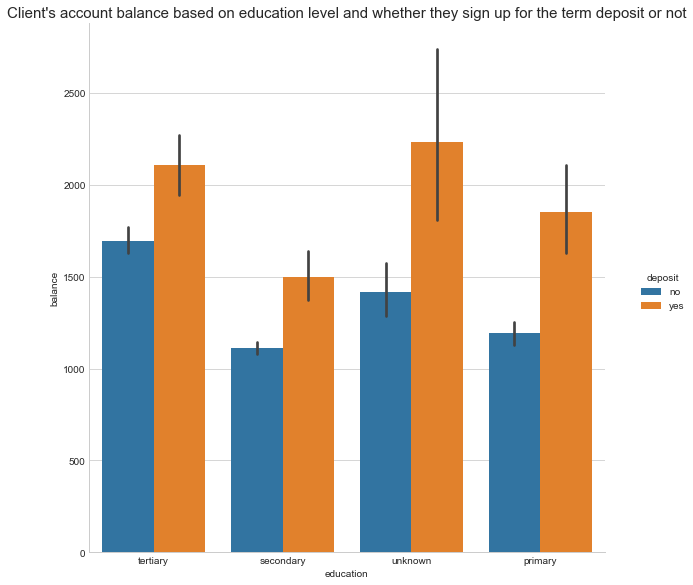

The level of education had a significant impact on the amount of balance a prospect had.


In [7]:
sns.factorplot(x="education", y="balance", hue="deposit", data=bank, size=8, kind="bar")
plt.title("Client's account balance based on education level and whether they sign up for the term deposit or not", fontsize=15)
plt.show()
print("The level of education had a significant impact on the amount of balance a prospect had.")

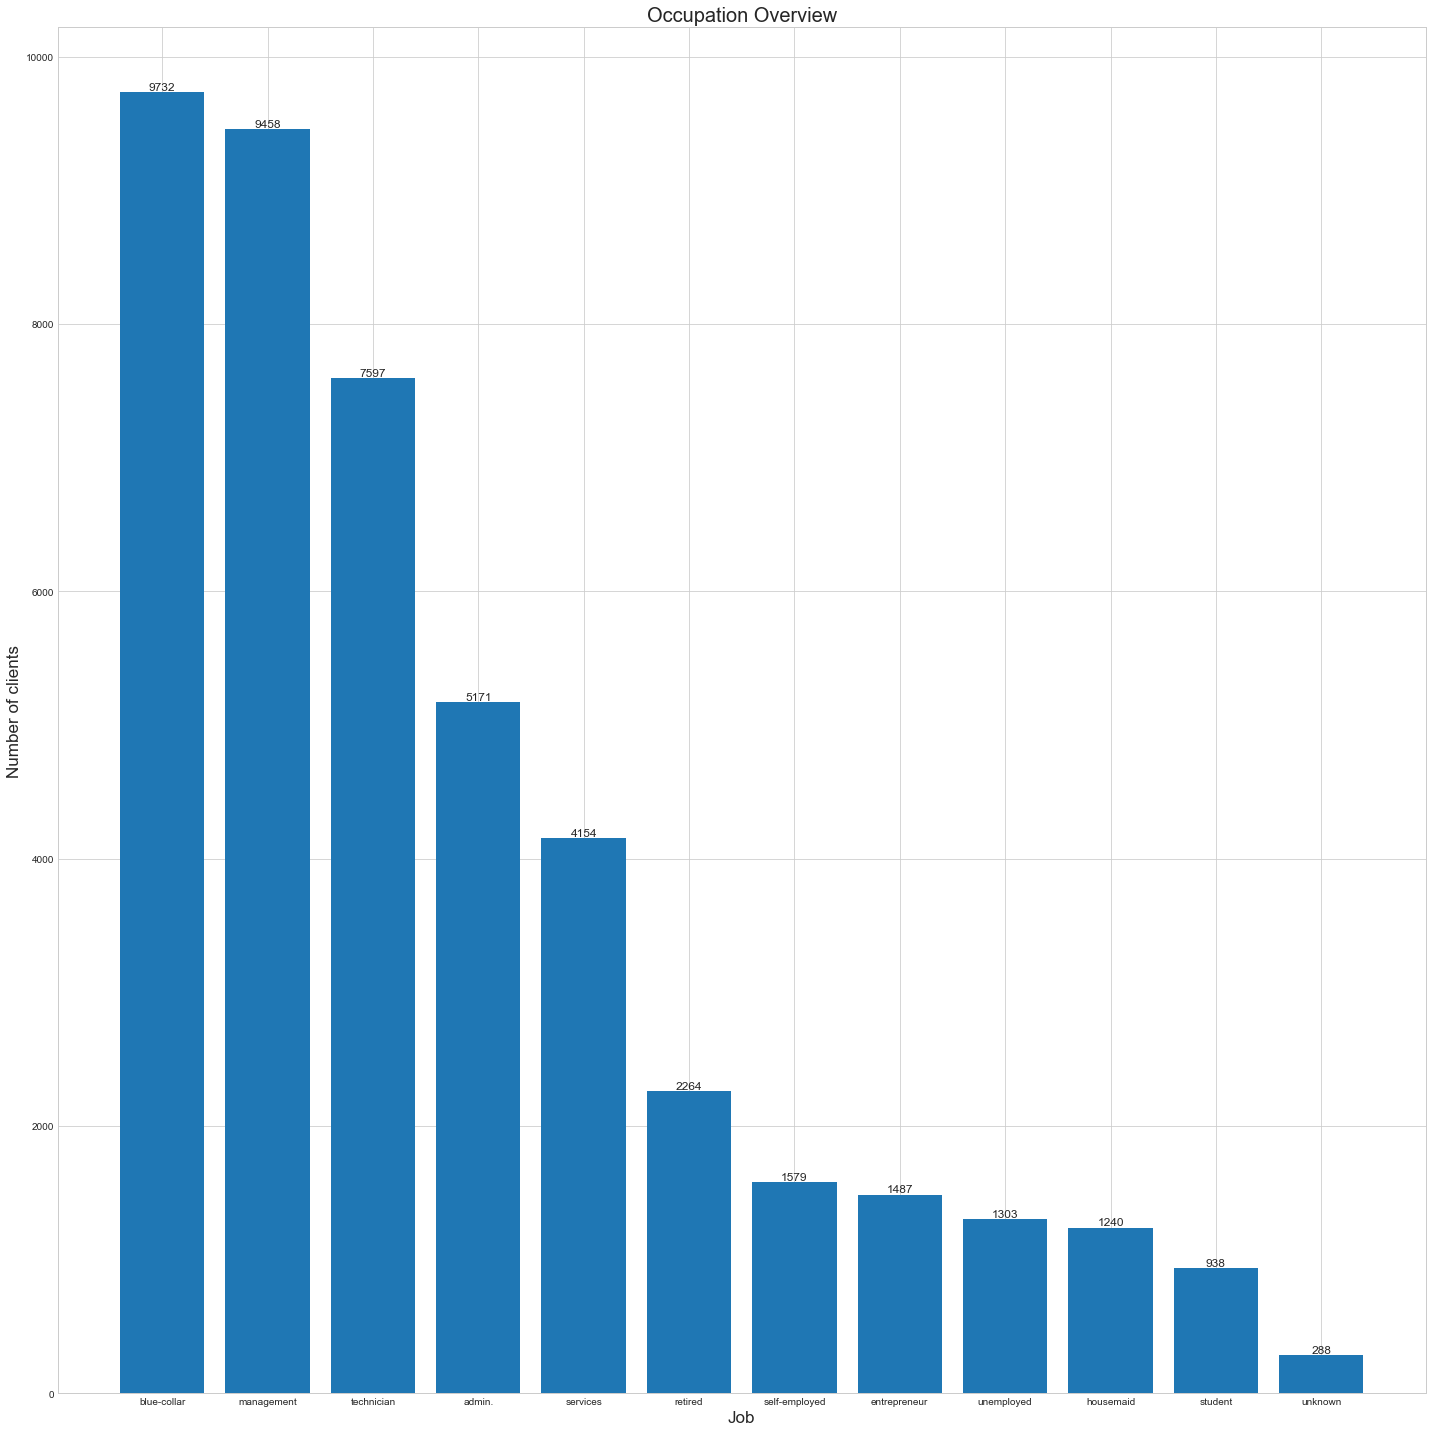

Most of the clients targeted in this campaign were blue-collar workers, with 9732 individuals.
Students were targeted the least, with 938 individuals.
Only 288 individuals did not provide their occupations.


In [8]:
# Occupation
jobs = bank['job'].value_counts()
#Plotting
plt.rcParams['figure.figsize']=[20,20]
plt.bar(jobs.index,jobs.values)
plt.xlabel('Job', fontsize=17)
plt.ylabel('Number of clients', fontsize=17)
plt.title('Occupation Overview', fontsize=20)
for index,data in enumerate(jobs.values):
    plt.text(x=index , y =data-1 , s=f"{data}" , fontdict=dict(fontsize=12), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("Most of the clients targeted in this campaign were blue-collar workers, with 9732 individuals.")
print("Students were targeted the least, with 938 individuals.")
print("Only 288 individuals did not provide their occupations.")

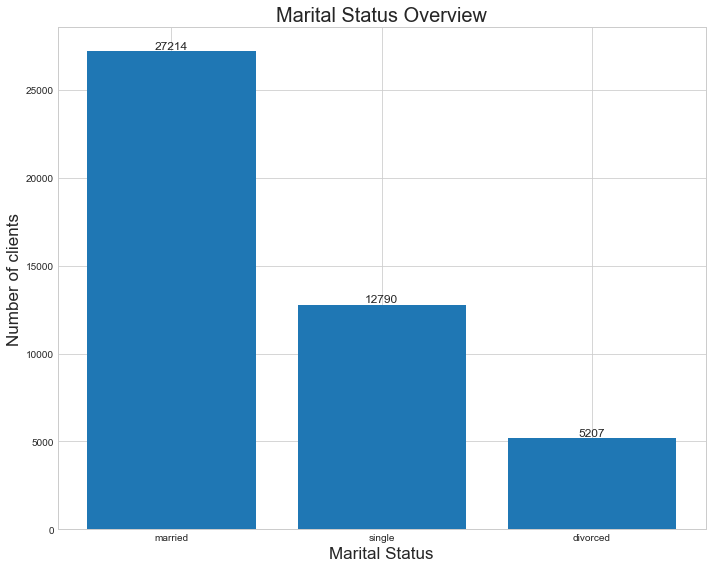

Most of the clients targeted in this campaign were married, with 27214 individuals.
Divorced individuals were targeted the least - i.e. 5207 clients, which was only around 10% of the total number of clients.


In [9]:
# Marital Status
mstatus = bank['marital'].value_counts()
#Plotting
plt.rcParams['figure.figsize']=[10,8]
plt.bar(mstatus.index,mstatus.values)
plt.xlabel('Marital Status', fontsize=17)
plt.ylabel('Number of clients', fontsize=17)
plt.title('Marital Status Overview', fontsize=20)
for index,data in enumerate(mstatus.values):
    plt.text(x=index , y =data-1 , s=f"{data}" , fontdict=dict(fontsize=12), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("Most of the clients targeted in this campaign were married, with 27214 individuals.")
print("Divorced individuals were targeted the least - i.e. 5207 clients, which was only around 10% of the total number of clients.")

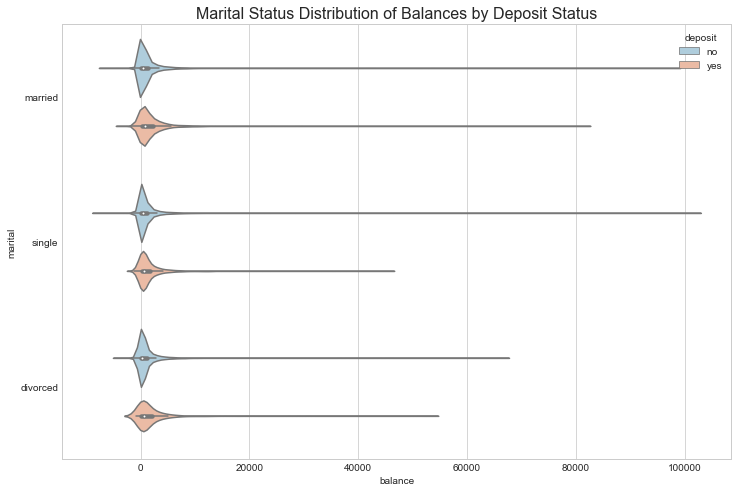

The divorced had a considerably lower amount of balance compared to the single and married.
Most of those who had signigicantly high balance did not sign up for the deposit.


In [10]:
fig = plt.figure(figsize=(12,8))
sns.violinplot(x="balance", y="marital", hue="deposit", palette="RdBu_r", data=bank)
plt.title("Marital Status Distribution of Balances by Deposit Status", fontsize=16)
plt.show()
print("The divorced had a considerably lower amount of balance compared to the single and married.")
print("Most of those who had signigicantly high balance did not sign up for the deposit.")

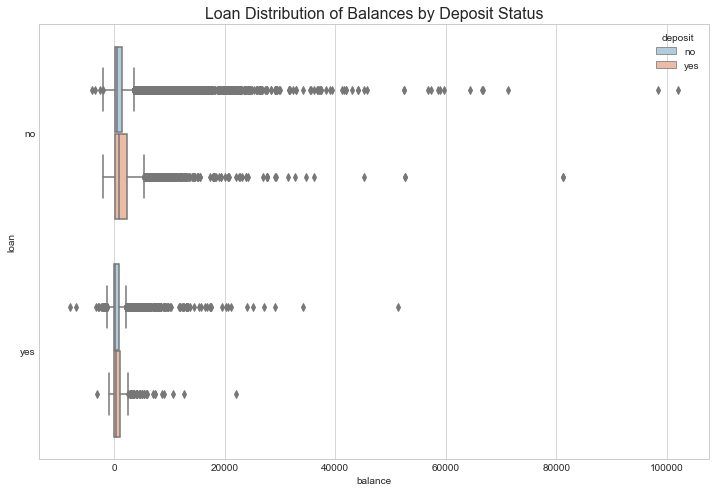

Those prospects who had personal loan had significantly lower balance compared to those who did not have loan.


In [11]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x="balance", y="loan", hue="deposit", palette="RdBu_r", data=bank)
plt.title("Loan Distribution of Balances by Deposit Status", fontsize=16)
plt.show()
print("Those prospects who had personal loan had significantly lower balance compared to those who did not have loan.")


## Descriptive Statistics

In [12]:
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,date,month,campaign,pdays,previous,poutcome,deposit
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


### Summary
The mean age is approximately 41 years old. Minimum age is 18 years old and Maximum age is 95 years old.

The mean balance is 1,362. The standard deviation (std) is a very high value (3044.77), which indicates that the data are much more spread out (the balance is heavily dispersed across the data set). 

In [13]:
# The pairwise correlation of all numerical variables in the bank dataframe.
bank.corr(method ='pearson')

,age,balance,date,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
date,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


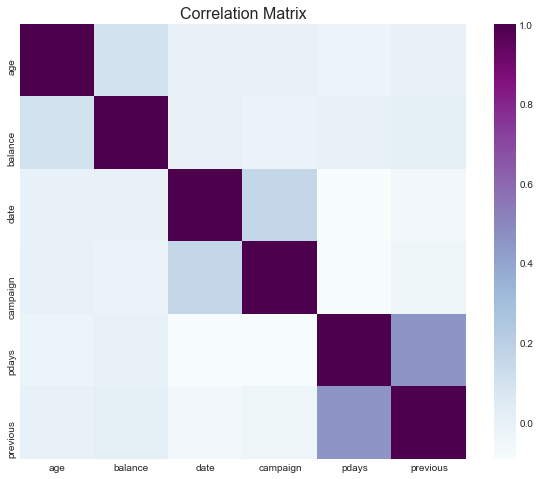

Most of the correlation coefficients between the numeric variables are small (less than 0.2). This indicates that there are weak associations between the numeric variables.
Only 'pdays' and 'previous' have the correlation coefficient equal to 0.45, which represents a moderate correlation.


In [14]:
numeric_bank = bank.select_dtypes(exclude="object")
corr_numeric = numeric_bank.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="BuPu")
plt.title("Correlation Matrix", fontsize=16)
plt.show()
print("Most of the correlation coefficients between the numeric variables are small (less than 0.2). This indicates that there are weak associations between the numeric variables.")
print("Only 'pdays' and 'previous' have the correlation coefficient equal to 0.45, which represents a moderate correlation.")

## Predictive Analytics (Part 1)
Predict if a prospect would sign up for a term deposit based on their banking account balance.

In [15]:
bank['deposit_10'] = (bank['deposit']  == "yes").astype(np.float32)
bank['deposit_10'].mean()

0.11698480695486069

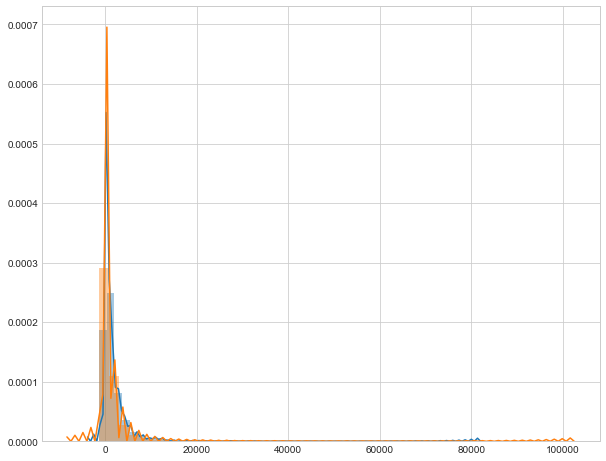

In [16]:
y, X = dmatrices('deposit_10 ~ balance', data=bank)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

In [17]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     39922
         1.0       0.15      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.52      0.50      0.47     45211
weighted avg       0.80      0.88      0.83     45211



### Summary from the accuracy matrix
The accuracy matrix shows precision measures. Precision for when the deposit label is 0 is about 88% whille precision for when the deposit label is 1 is almost 15%.

On average, it is about 80% precision. This is not a very good classifier.

## Predictive Analytics (Part 2)
Predict if a prospect would sign up for a term deposit based on their age, job, marital status, education level, default status, account balance, housing status, and personal loan status.

In [18]:
#Using Logistic Regression
y,X = dmatrices('deposit_10 ~ age + job + marital + education + default + balance + housing + loan', data=bank)
modelp2 = sklearn.linear_model.LogisticRegression()
modelp2.fit(X, y)
yhat = modelp2.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     39922
         1.0       0.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.44      0.50      0.47     45211
weighted avg       0.78      0.88      0.83     45211



### Summary from the accuracy matrix
The accuracy matrix shows precision measures. Precision for when the deposit label is 0 is about 88% whille precision for when the deposit label is 1 is almost 0%. 

On average, it is about 78% precision. This is not a very good classifier.

In [19]:
#Using Random Forest Classifier
y,X = dmatrices('deposit_10 ~ age + job + marital + education + default + balance + housing + loan', data=bank)
modelp2_new = sklearn.ensemble.RandomForestClassifier()
modelp2_new.fit(X, y)
yhat = modelp2_new.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

<ipython-input-19-3ba1257b5a21>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelp2_new.fit(X, y)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     39922
         1.0       0.97      0.90      0.93      5289

    accuracy                           0.98     45211
   macro avg       0.98      0.95      0.96     45211
weighted avg       0.98      0.98      0.98     45211



### Summary from the accuracy matrix
The accuracy matrix shows precision measures. Precision for when the deposit label is 0 is about 99% whille precision for when the deposit label is 1 is about 97%. 

On average, it is about 98% precision. This is a much more accurate model compared to the linear model.